In [2]:
import numpy as np
import scipy as scipy
from scipy.integrate import odeint
import matplotlib.pyplot as plt
r = np.linspace(0.0000001,10.3,1500) #GeV-1

#constants
m1 = 1.34
m2 = 1.34
#GeV/c^2 Mass of the Chamarium
invmu = 1/m1 + 1/m2
mu = 1/invmu
u0 = np.array([0.,1.0]) #dots to make sure number is real
a = 0.4 #dimensionless strong coupling constant
b = 0.1951228915397701 #GeV^2

In [3]:
def model_E(u,r,l,E):
    dvdr = (u[0]*l*(l+1))/(r**2) - 2*mu*u[0]*(E + ((4*a)/(3*r)) - b*r)
    return (u[1],dvdr)

In [4]:
def normalize_psi(psi, r):
    int_psi_square = scipy.integrate.simps(abs(psi) ** 2, r)
    return psi/np.sqrt(int_psi_square)

def square_psi(psi):
    return (np.array(psi))**2

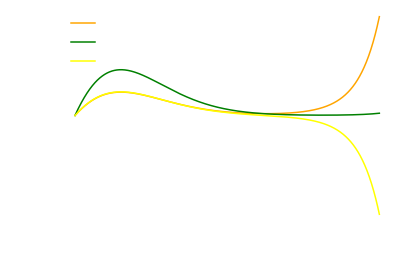

In [15]:
lower = normalize_psi(odeint(model_E,u0,r, args = (0, 0.3870))[:,0],r)
exact = normalize_psi(odeint(model_E,u0,r, args = (0, 0.3879882813))[:,0],r)
upper = normalize_psi(odeint(model_E,u0,r, args = (0, 0.3890))[:,0],r)
fig = plt.figure()

#plt.style.use('dark_background')
#fig.patch.set_facecolor('red')
ax = fig.add_subplot(111)
plt.plot(r, lower, label = 'E = 0.3870 GeV', color = "orange")
plt.plot(r, exact, label = 'E = 0.3880 GeV', color = 'green')
plt.plot(r, upper, label = 'E = 0.3890 GeV', color = "yellow")
plt.legend(loc = "upper left")
plt.xlabel("Quark Separation ($GeV^{-1}$)", color = 'white', fontsize = 'large')
plt.ylabel("Radial Wavefunction, $(|u_{n,l}|)$", color = 'white', fontsize = 'large')
ax.tick_params(axis = 'x', colors = 'white')
ax.tick_params(axis = 'y', colors = 'white')
ax.legend(loc = 'upper left', framealpha = 0, frameon = False, labelcolor = 'white', fontsize = 'large')


ax.patch.set_alpha(0)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.savefig('Wavefunction Investigation2.png', dpi = 600,bbox_inches='tight')
plt.show()


In [6]:
sum(square_psi(exact))

145.53451489588136